In [1]:
import numpy as np
import os
import sys
from pprint import pp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "multrun_results_new_run_trained_on_2_eg/2/total"
slice_results = os.listdir(path)

In [3]:
slice_results

['history_0.npz',
 'history_1.npz',
 'history_2.npz',
 'history_3.npz',
 'history_4.npz',
 'history_5.npz']

In [13]:
# slice_1 = slice_results[0]
# slice_path = f"{path}/{slice_1}/"
# slice_paths = os.listdir(slice_path)
data = False
actions = None
regret = None
violations = None
WINDOW = 500
for i,history in enumerate(slice_results):
    histories = np.load(f"{path}/history_{i}.npz")
#     print_histories(histories)
    violations, regret, actions = stackuphistory(histories, data, actions, regret, violations, WINDOW)
    data = True
    
# plot_histories(actions, regret, violations)

In [164]:
print_histories(slice_1_results)

violation:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [129]:
np.set_printoptions(threshold=sys.maxsize)

In [134]:
violations[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
for slice in slice_results:
    slice_path = f"{path}/{slice_1}/"
    slice_paths = os.listdir(slice_path)
    data = False
    actions = None
    regrets = None
    violations = None
    for i,history in enumerate(slice_paths):
        histories = np.load(f"{path}/{slice_1}/history_{i}.npz")
        violations, regret, actions = stackuphistory(histories, data, actions, regrets, violations)
        data = True
    print(actions)
    print(regrets)
    print(violations)
 

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.5 0.5 0.5 0.5 0.5
 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3
 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

[1.  1.  1.2 1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6 4.8 5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  4.8 4.6 4.2 4.  3.6 3.2 3.  3.  2.8 2.8 3.  3.  3.4

[0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8
 0.9 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7
 0.8 0.9 1.  0.9 0.8 0.7 0.6 0.5 0.4 0.4 0.4 0.4 0.4 0.5 0.6 0.7 0.8 0.9
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  

[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0

[0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

[  1.    1.5   2.1   2.8   3.6   4.5   5.5   6.5   7.5   8.5   9.5  10.5
  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5
  23.5  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5
  35.5  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5
  47.5  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5
  59.5  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5
  71.5  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5
  83.5  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5
  95.5  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5
 107.5 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5
 119.5 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5
 131.5 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5
 143.5 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5
 155.5 156.5 157.5 158.5 159.5 160.5 161.5 162.5 16

[0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.2 0.3
 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.9 0.8 0.7
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.8 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [61]:

# slice_1_results = np.load(f"{path}/{slice_1}/history")

In [49]:
def print_histories(slice_1_results):
    print("violation: ", violations := slice_1_results['violation'])
    print("reward: ", rewards := slice_1_results['reward'])
    print("resources: ", resources := slice_1_results['resources'])
    episodes = np.arange(0, len(slice_1_results['violation']))

In [50]:
data = pd.DataFrame({
    'Episodes': episodes,
    'Violations': violations,
    'Rewards': rewards,
    'Resources': resources
})

NameError: name 'episodes' is not defined

In [109]:
data.head()

AttributeError: 'bool' object has no attribute 'head'

In [45]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting Rewards over Episodes
plt.figure(figsize=(1, 8))

# Subplot 1: Rewards over Episodes
# plt.subplot(2, 2, 1)
plt.plot(data['Episodes'], data['Rewards'], color='blue', marker='o', linestyle='-')
plt.title('Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.ylim(0, 1)
plt.show()

# Subplot 2: Bar Plot of Violations
# plt.subplot(2, 2, 2)
sns.countplot(x='Episodes', hue='Violations', data=data, palette='Set1', dodge=True)
plt.title('Violations Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Count of Violations')
plt.legend(title='Violations', loc='upper right', labels=['No Violation (0)', 'Violation (1)'])
plt.show()

# Subplot 3: Scatter Plot of Rewards vs. Resources
# plt.subplot(2, 2, 3)
plt.scatter(data['Resources'], data['Rewards'], alpha=0.6, color='orange')
plt.title('Rewards vs. Resources')
plt.xlabel('Resources')
plt.ylabel('Rewards')
plt.ylim(0, 1)
plt.show()

# Subplot 4: Histogram of Resources
# plt.subplot(2, 2, 4)
sns.histplot(data['Resources'], bins=np.arange(-0.5, 6.5, 1), kde=False, color='green')
plt.title('Distribution of Resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

TypeError: 'bool' object is not subscriptable

<Figure size 100x800 with 0 Axes>

In [7]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [6]:
def stackuphistory(histories, data, actions, regret, violations, WINDOW):
    _violations = histories['violation']
    _resources = histories['resources']
    # load data for each run
    if not data:
        violations = movingaverage(_violations, WINDOW)
        regret = movingaverage(_violations.cumsum(), WINDOW)
        actions = movingaverage(_resources, WINDOW)
    else: # store the history of each run
        violations = np.vstack((violations, movingaverage(_violations, WINDOW)))
        regret = np.vstack((regret, movingaverage(_violations.cumsum(), WINDOW)))
        actions = np.vstack((actions, movingaverage(_resources, WINDOW)))
    return violations, regret, actions
                   

In [15]:
START = 0
END = 150000
SPAN = END - START
prbs_values = [200, 150, 100]
scenario = 0
scenarios = [0]
label = "CMAPPO"
runs = 6
# actions, regrets, violations = stackuphistory(histories, false)

def plot_histories(actions, regrets, violations):
    actions_mean = np.mean(actions, axis=0)
#     print(actions_mean)
    actions_std = np.std(actions, axis=0)
    violations_mean = np.mean(violations, axis=0)
    violations_std = np.std(violations, axis=0)
    regret_mean = np.mean(regret, axis=0)
    regret_std = np.std(regret, axis=0)

    # plot results
    steps = np.arange(len(actions_mean[0:SPAN]))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.5), constrained_layout=True)

    axs[0].set_title('SLA violations')
    axs[0].plot(steps, violations_mean[0:SPAN], label = label)
    # ax3.fill_between(steps, violations_mean - violations_std, violations_mean + violations_std, color = '#DDDDDD')
    axs[0].fill_between(steps, violations_mean[0:SPAN] - 1.697 * violations_std[0:SPAN] / np.sqrt(runs), 
                    violations_mean[0:SPAN] + 1.697 * violations_std[0:SPAN] / np.sqrt(runs), color = '#DDDDDD')
#     if algo == algo_names[-1]:
    axs[0].set_xlabel('stages')  # Add an x-label to the axes.
    axs[0].set_ylabel('SLA violations')
    axs[0].legend(loc='best')
    axs[0].grid()

    axs[1].set_title('Cumulative SLA violations')
    axs[1].plot(steps, regret_mean[0:SPAN], label = label)
    # ax4.fill_between(steps, regret_mean - regret_std, regret_mean + regret_std, color = '#DDDDDD')
    axs[1].fill_between(steps, regret_mean[0:SPAN] - 1.697 * regret_std[0:SPAN] / np.sqrt(30), 
                    regret_mean[0:SPAN] + 1.697 * regret_std[0:SPAN] / np.sqrt(30), color = '#DDDDDD')
#     if algo == algo_names[-1]:
    axs[1].set_xlabel('stages')  # Add an x-label to the axes.
    axs[1].set_ylabel('cumulative SLA violations')
    axs[1].set_ylim((0,500))
    # axs[1].legend(loc='best')
    axs[1].grid()        

    if START > 0:
        fig.savefig('./figures/_trained_subplots_2_{}.png'.format(scenario), format='png')
    else:
        fig.savefig('./figures/subplots_NEW_2_{}.png'.format(scenario), format='png')     


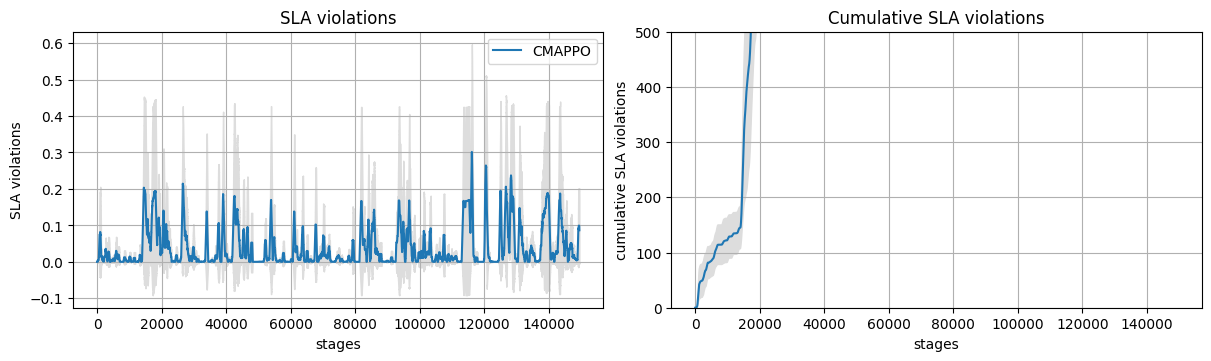

In [16]:
plot_histories(actions, regret, violations)